In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Gán tên cột chuẩn
col_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [59]:
# Các cột mà 0 được coi là missing
missing_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in missing_cols:
    df[col] = df[col].replace(0, np.nan)

In [60]:
# Thống kê missing
print(df.isna().sum())

# Impute đơn giản: median
df_imputed = df.fillna(df.median())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [61]:
# Phân bố Outcome
print(df_imputed['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [62]:
# Thống kê theo Outcome
print(df_imputed.groupby('Outcome').mean()[['Glucose','BMI','Age','Pregnancies']])

            Glucose        BMI        Age  Pregnancies
Outcome                                               
0        110.682000  30.885600  31.190000     3.298000
1        142.130597  35.383582  37.067164     4.865672


In [63]:
# Correlation matrix
corr = df_imputed.corr()
print(corr['Outcome'].abs().sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


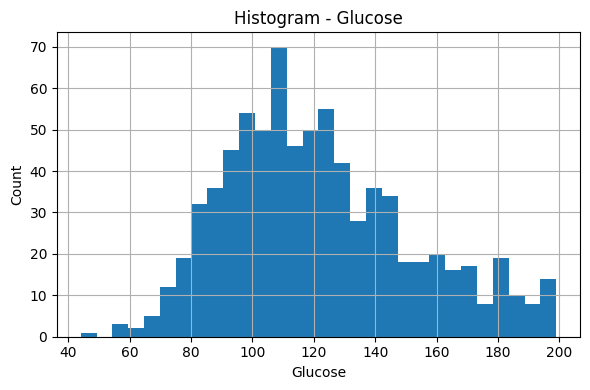

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df_imputed['Glucose'].hist(bins=30)
plt.title("Histogram - Glucose")
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig("hist_Glucose.png")
plt.show()


In [65]:
import seaborn as sns
import os

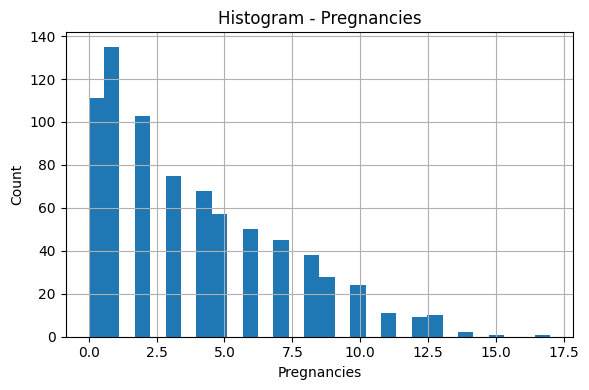

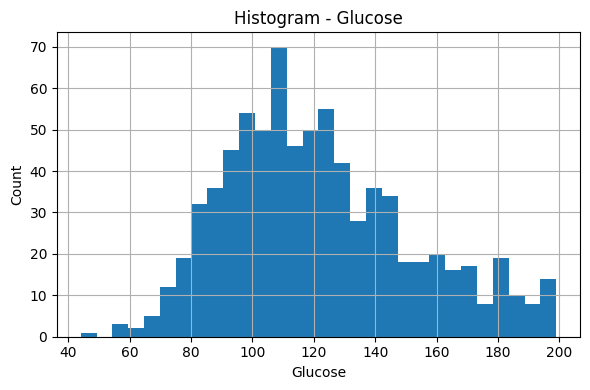

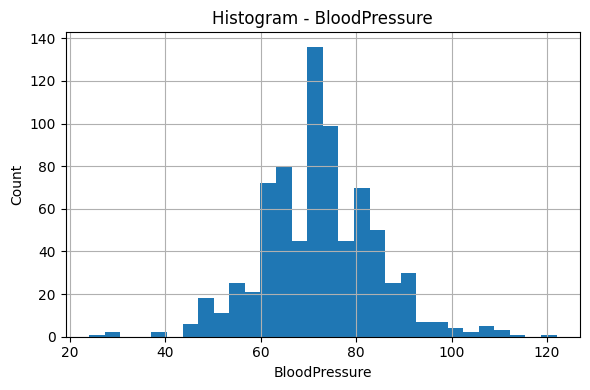

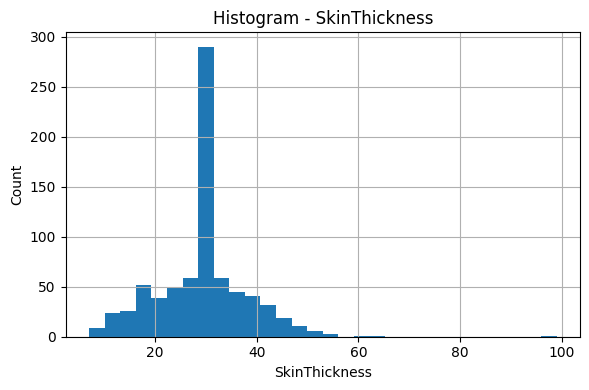

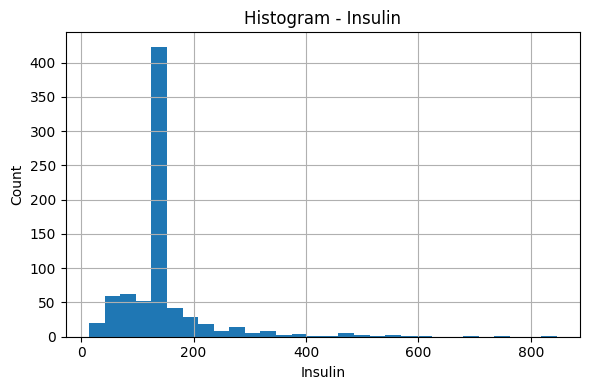

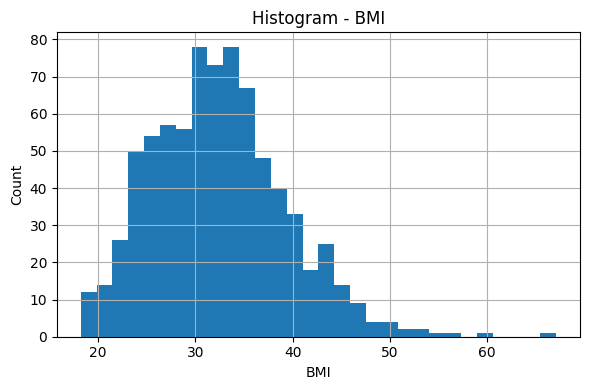

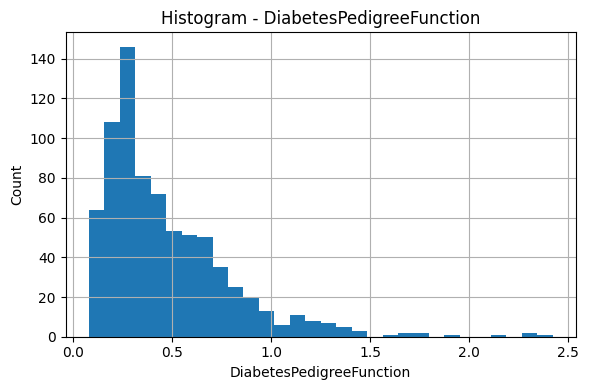

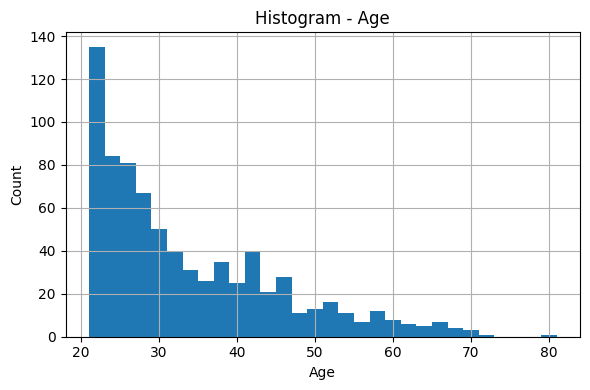

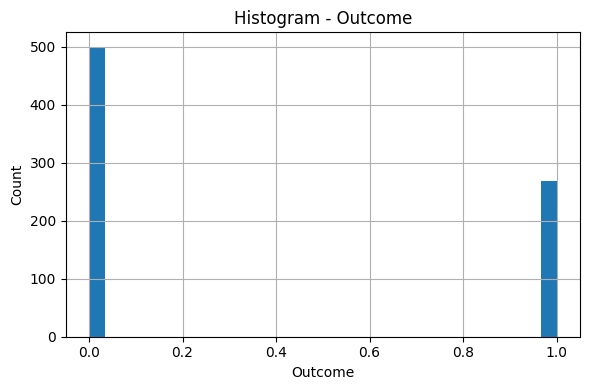

In [66]:
save_dir = "/mnt/data/pima_plots/"
os.makedirs(save_dir, exist_ok=True)

for col in df_imputed.columns:
    # Histogram
    plt.figure(figsize=(6,4))
    df_imputed[col].hist(bins=30)
    plt.title(f"Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f"{save_dir}/hist_{col}.png")
    plt.show()
    plt.close()

    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_imputed[col])
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
    plt.savefig(f"{save_dir}/box_{col}.png")
    plt.close()

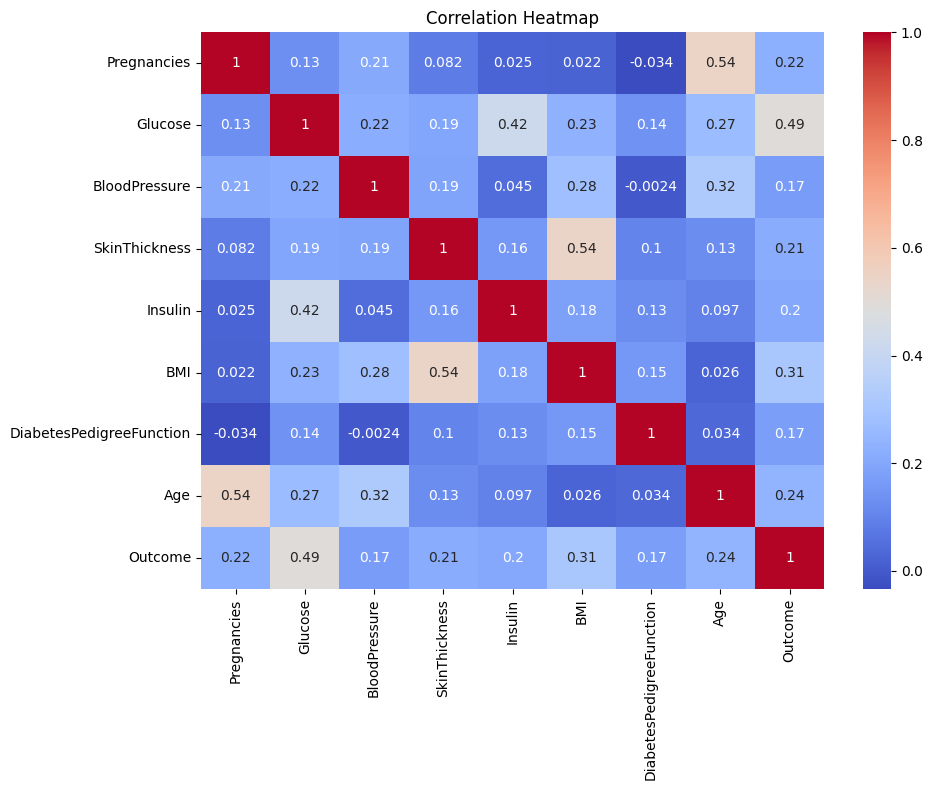

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(df_imputed.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("corr_heatmap.png")
plt.show()
plt.close()

In [68]:
from pandas.plotting import scatter_matrix

<Figure size 640x480 with 0 Axes>

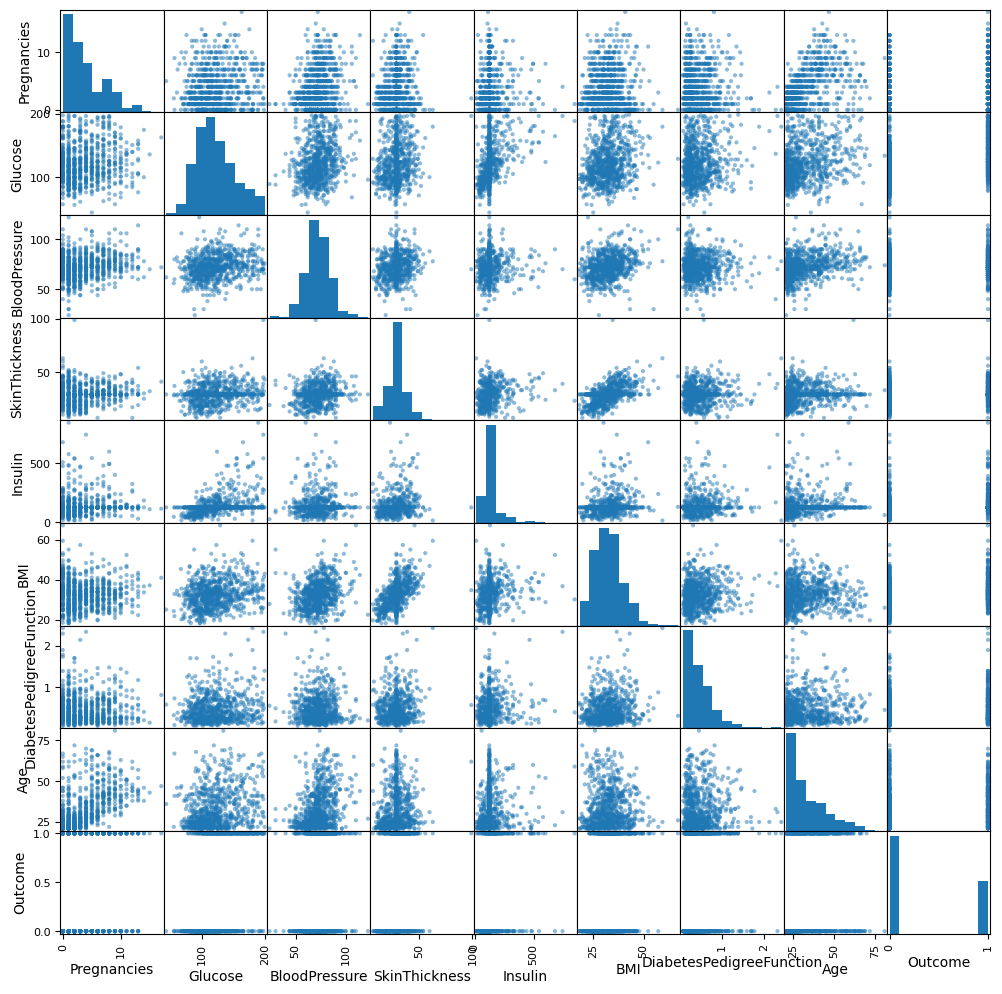

In [71]:
plt.figure()
scatter_matrix(df_imputed, figsize=(12,12))
plt.savefig("scatter_matrix.png")
plt.show()
plt.close()